# Employee Attrition Analysis

## 1-Introduction
Employee attrition refers to the gradual reduction of an organization's workforce due to resignations, retirements, or other reasons. Understanding the factors contributing to attrition is critical for improving employee retention and minimizing recruitment costs.


## Objectives Of This Project:
- Identify patterns and trends in employee attrition.
- Explore the relationships between various employee attributes and attrition.
- Build a predictive model to classify employees likely to leave.


## Dataset Overview
The dataset contains information about employees, including:
- **Demographics**: Age, gender, marital status, etc.
- **Job-related information**: Job role, department, years at company, etc.
- **Performance metrics**: Job satisfaction, environment satisfaction, etc.
- **Compensation details**: Monthly income, stock options, etc.


In [1]:
# Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# To change Scientific Notation to Decimal Format
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Reading the dataset
df = pd.read_csv(r'C:\Users\mahmo\OneDrive\Desktop\ITI\01-Power BI\06-Python\Lab 3\Employee-Attrition.csv')

## 2-Display Dataset Information

In [3]:
# Display number of rows and columns of the dataset
df.shape

(1470, 35)

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Display the first few rows of the dataset
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [6]:
# Select numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(f'numerical_columns count: {numerical_columns.shape[0]}')
print(f'categorical_columns count: {categorical_columns.shape[0]}')

numerical_columns count: 26
categorical_columns count: 9


In [7]:
# Describe each numerical column one by one with improved readability
for col in numerical_columns:
    print("=" * 50)
    print(f"Summary for {col}:")
    print("=" * 50)
    # Display the summary with more readable formatting
    summary = df[col].describe()
    print(summary)
    print("-" * 50)

Summary for Age:
count   1470.00
mean      36.92
std        9.14
min       18.00
25%       30.00
50%       36.00
75%       43.00
max       60.00
Name: Age, dtype: float64
--------------------------------------------------
Summary for DailyRate:
count   1470.00
mean     802.49
std      403.51
min      102.00
25%      465.00
50%      802.00
75%     1157.00
max     1499.00
Name: DailyRate, dtype: float64
--------------------------------------------------
Summary for DistanceFromHome:
count   1470.00
mean       9.19
std        8.11
min        1.00
25%        2.00
50%        7.00
75%       14.00
max       29.00
Name: DistanceFromHome, dtype: float64
--------------------------------------------------
Summary for Education:
count   1470.00
mean       2.91
std        1.02
min        1.00
25%        2.00
50%        3.00
75%        4.00
max        5.00
Name: Education, dtype: float64
--------------------------------------------------
Summary for EmployeeCount:
count   1470.00
mean       1.00
std

In [8]:
# Display numerical columns data types and brief describtion for each
df[categorical_columns].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


## Visualizations for the Overview


### Attrition Distribution Visualization 


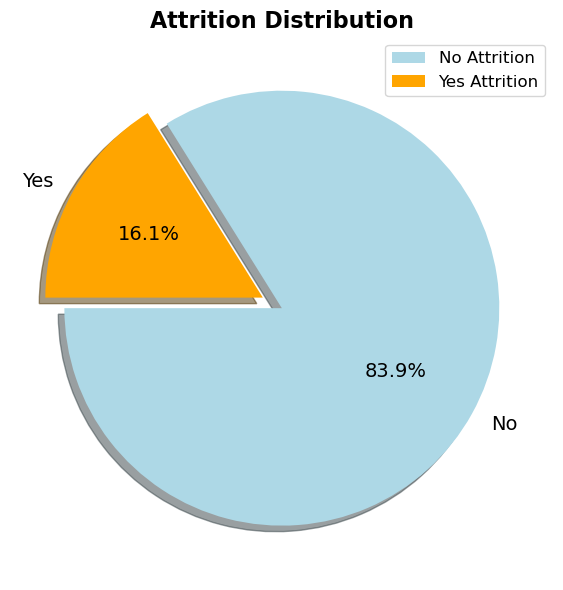

In [9]:
# Plot Attrition Distribution
plt.figure(figsize=(8, 6))
attrition_counts = df['Attrition'].value_counts()

# Create a pie chart
plt.pie(attrition_counts, 
        autopct='%1.1f%%', 
        colors=["lightblue", "orange"], 
        labels=["No", "Yes"], 
        explode=(0, 0.1), 
        shadow=True,
        startangle=180,
        textprops={'fontsize': 14, 'color': 'black'})

# Title
plt.title("Attrition Distribution", fontsize=16, fontweight='bold')
plt.ylabel("")  # Remove y-axis label for better aesthetics

# Add a legend for clarity
plt.legend(["No Attrition", "Yes Attrition"], loc="upper right", fontsize=12)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

### Gender Distribution Visualization

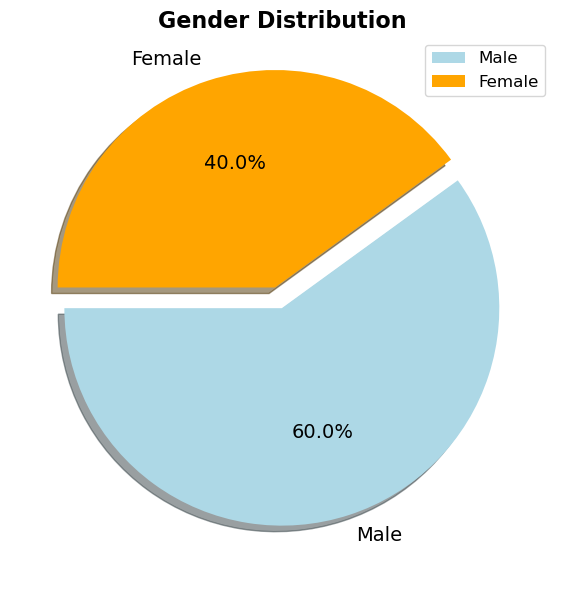

In [10]:
# Plot Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.pie(gender_counts, 
        autopct='%1.1f%%', 
        colors=["lightblue", "orange"], 
        labels=["Male", "Female"], 
        explode=(0, 0.1), 
        shadow=True,
        startangle=180,
        textprops={'fontsize': 14, 'color': 'black'})

# Title
plt.title("Gender Distribution", fontsize=16, fontweight='bold')
plt.ylabel("")  # Remove y-axis label for better aesthetics

# Add a legend for clarity
plt.legend(["Male", "Female"], loc="upper right", fontsize=12)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

### Marital Status Distribution Visualization

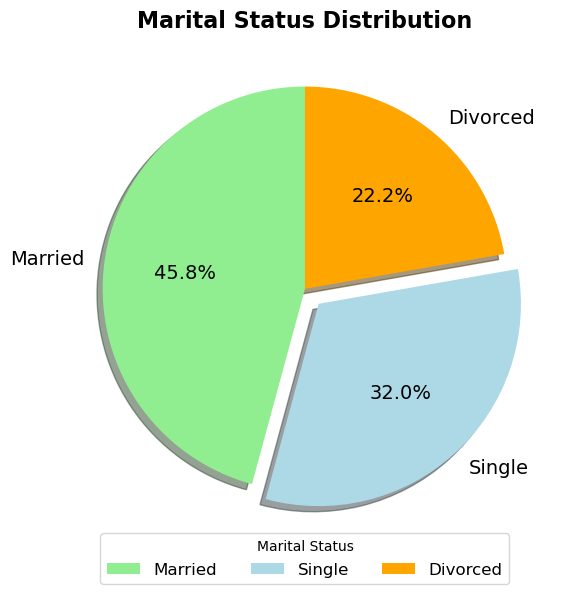

In [11]:
# Plot Marital Status Distribution
plt.figure(figsize=(8, 6))
marital_counts = df['MaritalStatus'].value_counts()

# Create a pie chart
plt.pie(marital_counts, 
        autopct='%1.1f%%', 
        colors=["lightgreen", "lightblue", "orange"], 
        labels=marital_counts.index, 
        explode=(0, 0.1, 0),  # Highlight the second category (e.g., Married)
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14, 'color': 'black'})

# Title
plt.title("Marital Status Distribution", fontsize=16, fontweight='bold')
plt.ylabel("")  # Remove y-axis label for better aesthetics

# Add a legend at the bottom center
plt.legend(marital_counts.index, loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=12, title="Marital Status", ncol=3)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


### Age Distribution Visualization

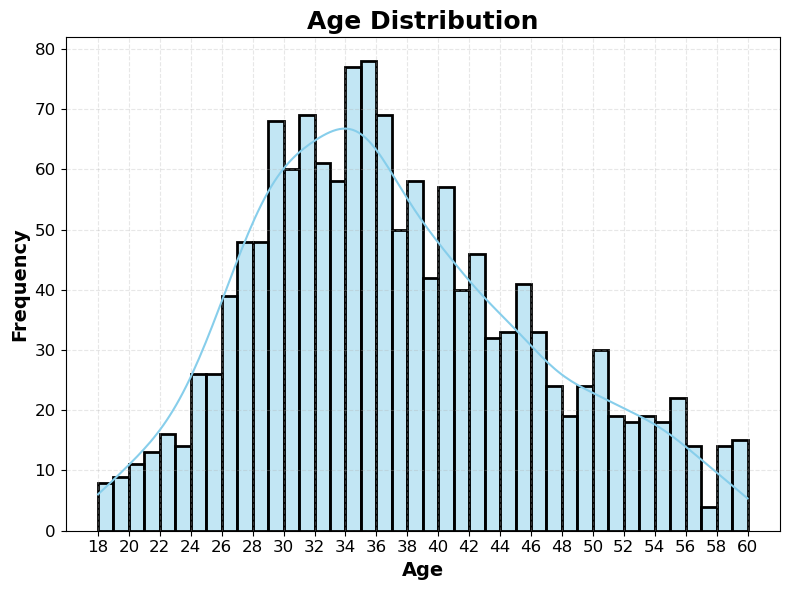

In [12]:
# Plot the distribution of Age with enhanced aesthetics
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True, color='skyblue', bins=42, linewidth=2)

# Add title and labels with improved font size and style
plt.title("Age Distribution", fontsize=18, fontweight='bold')
plt.xlabel("Age", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')

# Customize the x-axis ticks to show every 2 years
plt.xticks(range(int(df['Age'].min()), int(df['Age'].max())+1, 2), fontsize=12)

# Customize the y-axis ticks
plt.yticks(fontsize=12)

# Add gridlines to make the plot easier to interpret
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout for better aesthetics and tight layout
plt.tight_layout()

# Display the plot
plt.show()

### Monthly Income Distribution Visualization

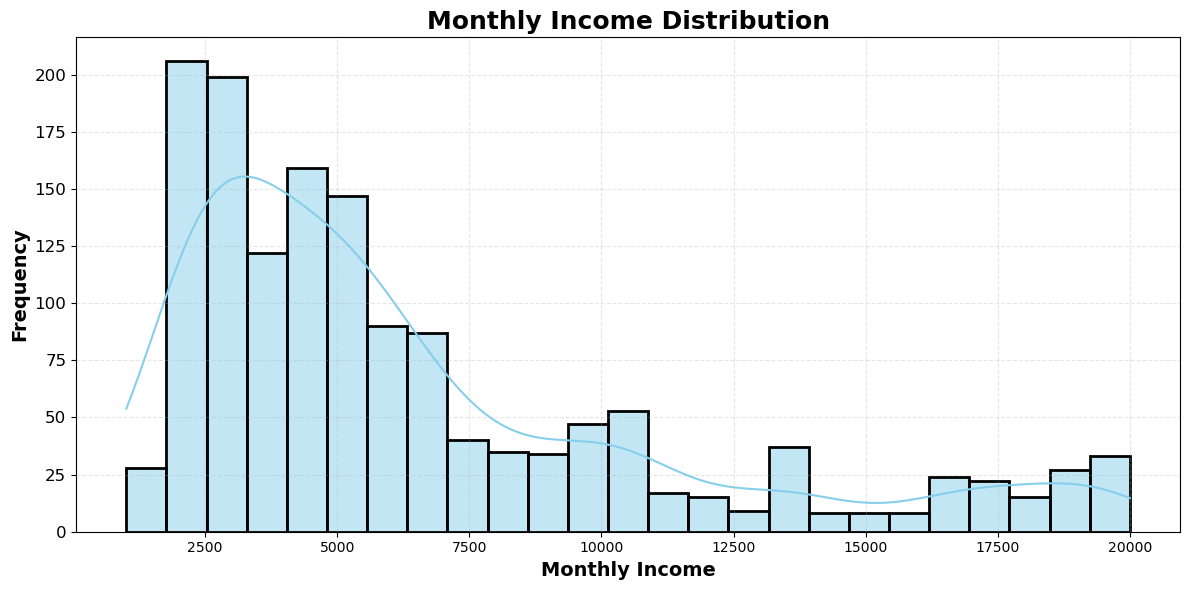

In [13]:
# Plot MonthlyIncome distribution using histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyIncome'], kde=True, color='skyblue',  bins=25, linewidth=2)

# Add title and labels
plt.title("Monthly Income Distribution", fontsize=18, fontweight='bold')
plt.xlabel("Monthly Income", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')

# Customize the y-axis ticks
plt.yticks(fontsize=12)

# Add gridlines to make the plot easier to interpret
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout for better aesthetics and tight layout
plt.tight_layout()

# Display the plot
plt.show()

### Job Role Distribution Visualization

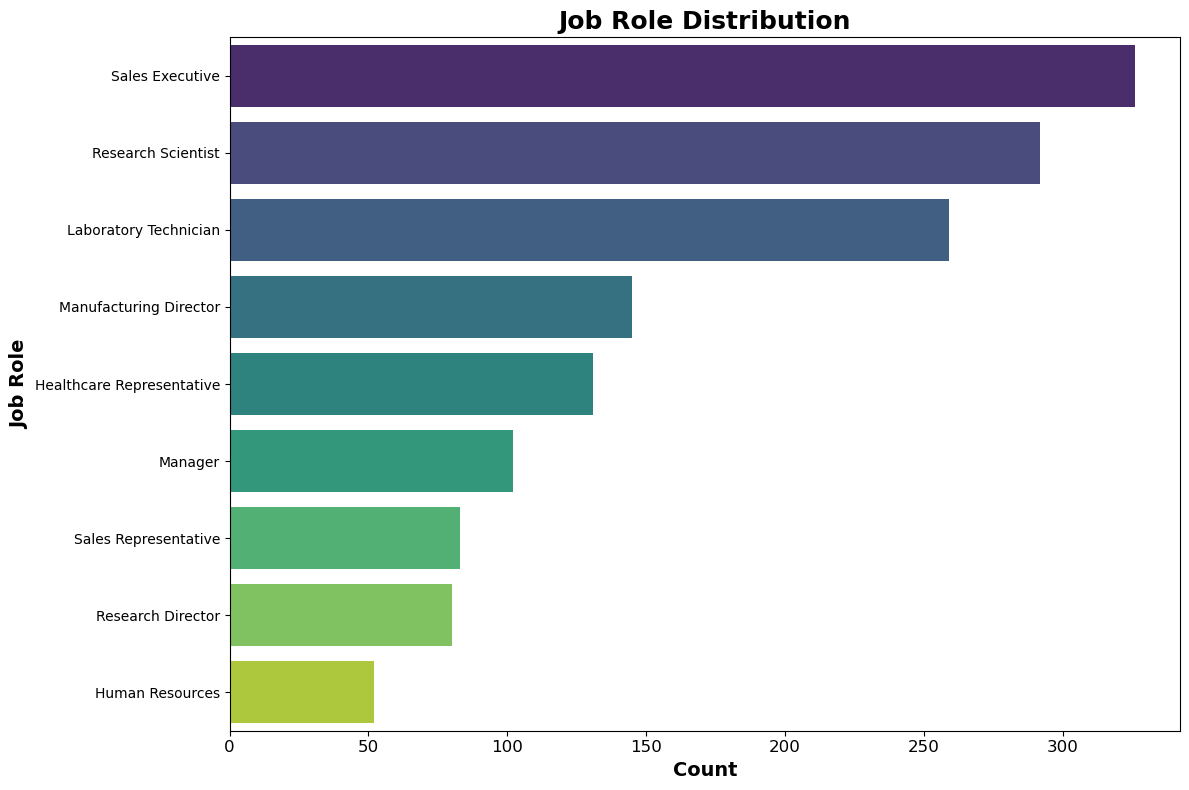

In [14]:
# Plot the distribution of JobRole using a bar chart
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='JobRole', palette='viridis', order=df['JobRole'].value_counts().index)

# Add title and labels with improved font size and style
plt.title("Job Role Distribution", fontsize=18, fontweight='bold')
plt.ylabel("Job Role", fontsize=14, fontweight='bold')
plt.xlabel("Count", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0, fontsize=12)

# Adjust layout to avoid label overlap
plt.tight_layout()

# Display the plot
plt.show()

## 2-Data Cleaning

### **Handling Null Values:**

In [15]:
# Display missing values in each column
print("=" * 50)
print("Missing Values Summary")
print("=" * 50)
print(df.isnull().sum())

Missing Values Summary
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRol

### **Detecting Duplicated Rows:**

In [16]:
# Count duplicate rows in the dataset
duplicate_count = df.duplicated().sum()
print("=" * 50)
print("Duplicate Rows Summary")
print("=" * 50)
print(f"Total Duplicate Rows: {duplicate_count}")

Duplicate Rows Summary
Total Duplicate Rows: 0


### **Identifying Invalid Values:**
* Incorrect data type formats
* Values that fall outside the valid range or expected values

In [17]:
# Display value counts for categorical columns with improved readability
print("=" * 50)
print("Value Counts for Categorical Columns")
print("=" * 50)

for col in categorical_columns:
    print("=" * 50)
    print(f"Column: {col}")
    print("=" * 50)
    value_counts = df[col].value_counts()
    print(value_counts.to_string(index=True, header=False))
    print("-" * 50)

Value Counts for Categorical Columns
Column: Attrition
No     1233
Yes     237
--------------------------------------------------
Column: BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
--------------------------------------------------
Column: Department
Research & Development    961
Sales                     446
Human Resources            63
--------------------------------------------------
Column: EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
--------------------------------------------------
Column: Gender
Male      882
Female    588
--------------------------------------------------
Column: JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83

In [18]:
# Display max and min values for numerical columns
print("=" * 50)
print("Max and Min Values for Numerical Columns")
print("=" * 50)
for col in numerical_columns:
    max_value = df[col].max()
    min_value = df[col].min()
    print(f"Column: {col}")
    print(f"  Max: {max_value}")
    print(f"  Min: {min_value}")
    print("-" * 50)

Max and Min Values for Numerical Columns
Column: Age
  Max: 60
  Min: 18
--------------------------------------------------
Column: DailyRate
  Max: 1499
  Min: 102
--------------------------------------------------
Column: DistanceFromHome
  Max: 29
  Min: 1
--------------------------------------------------
Column: Education
  Max: 5
  Min: 1
--------------------------------------------------
Column: EmployeeCount
  Max: 1
  Min: 1
--------------------------------------------------
Column: EmployeeNumber
  Max: 2068
  Min: 1
--------------------------------------------------
Column: EnvironmentSatisfaction
  Max: 4
  Min: 1
--------------------------------------------------
Column: HourlyRate
  Max: 100
  Min: 30
--------------------------------------------------
Column: JobInvolvement
  Max: 4
  Min: 1
--------------------------------------------------
Column: JobLevel
  Max: 5
  Min: 1
--------------------------------------------------
Column: JobSatisfaction
  Max: 4
  Min: 1
----

## 3-Exploratory Data Analysis (EDA) and Observations

In this section, we explore the dataset to uncover patterns, trends, and relationships among different features. We will analyze both categorical and numerical columns to gain insights into factors influencing employee attrition.


### JobRole Distribution with Attrition

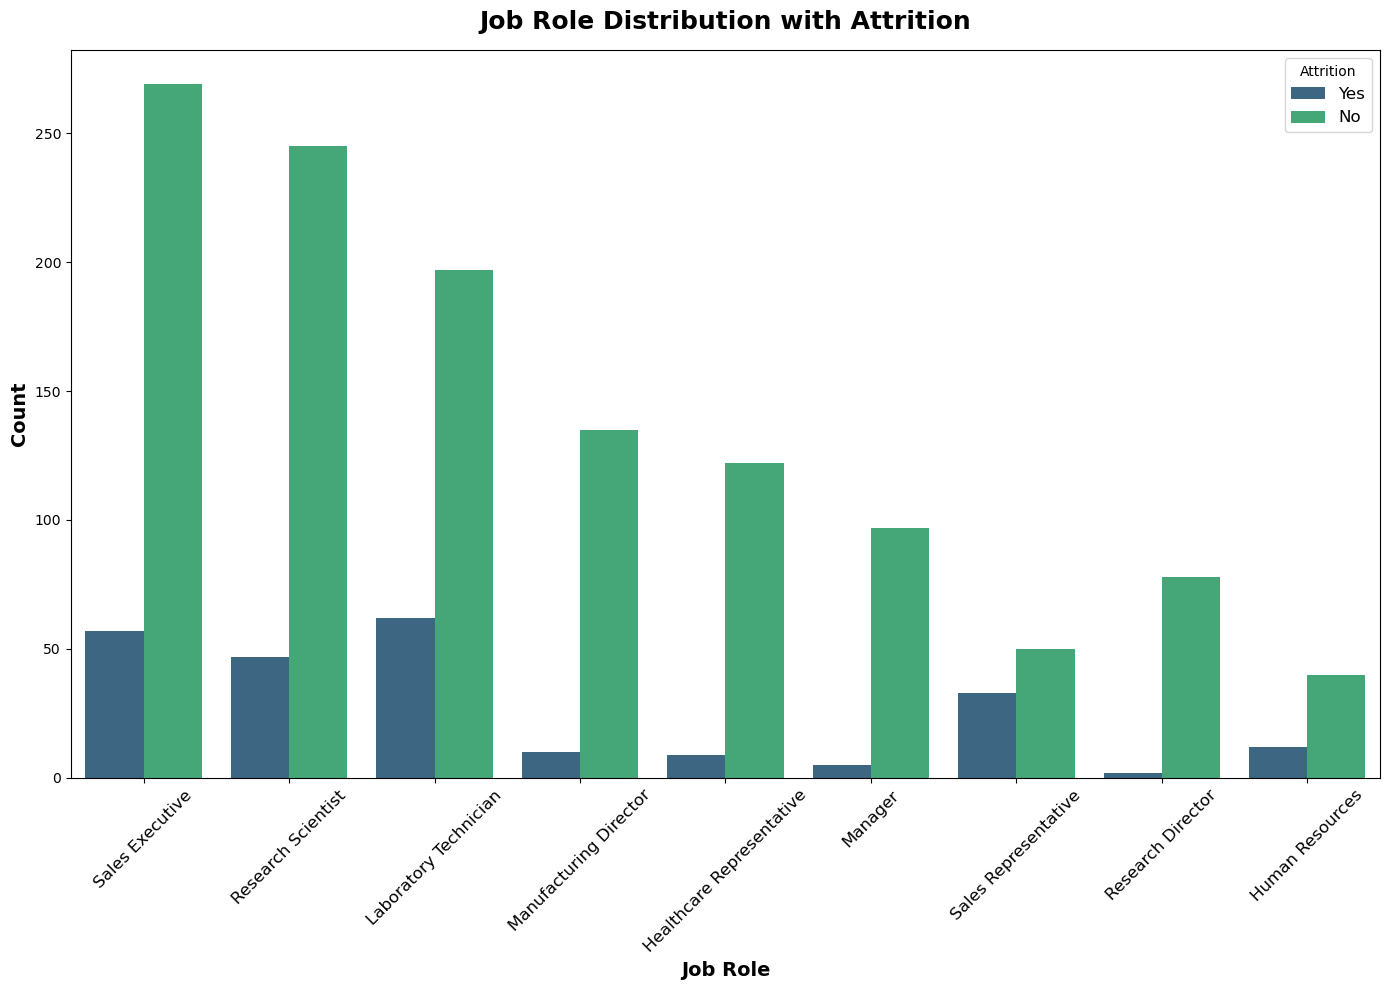

In [19]:
# Plot JobRole Distribution with Attrition
plt.figure(figsize=(14, 10))

# Count plot
sns.countplot(data=df, x='JobRole', hue="Attrition", palette="viridis")

# Add titles and labels
plt.title("Job Role Distribution with Attrition", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Job Role", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')

# Customize x-axis tick labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Add legend with clear labels
plt.legend(title="Attrition", loc="upper right", fontsize=12)

# Adjust layout for better aesthetics
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# Group by the categorical column and Attrition, then count occurrences
group_counts = df.groupby(['JobRole'])['Attrition'].value_counts()

# Calculate percentages for each category
group_percentages = group_counts / group_counts.groupby(level=0).sum() * 100

# Filter percentages for "Yes" Attrition only
yes_attrition_percentages = group_percentages.xs('Yes', level=1).round(2)

# Display the percentages in a clean format
print("=" * 50)
print("Percentage of 'Yes' Attrition by Job Role")
print("=" * 50)
for job_role, percentage in yes_attrition_percentages.items():
    print(f"{job_role}: {percentage}%")
print("=" * 50)

Percentage of 'Yes' Attrition by Job Role
Healthcare Representative: 6.87%
Human Resources: 23.08%
Laboratory Technician: 23.94%
Manager: 4.9%
Manufacturing Director: 6.9%
Research Director: 2.5%
Research Scientist: 16.1%
Sales Executive: 17.48%
Sales Representative: 39.76%


#### Insight on Job Role and Attrition:
- Sales Representative has the highest attrition rate at 40%, significantly higher than other roles.
- Research Director and Manager roles show much lower attrition, at 2.5% and 5%, respectively.
#### Summary:
- The high attrition in Sales Representative suggests potential dissatisfaction or challenges specific to the role, while the low attrition in other roles indicates better retention.
#### Action:
- Investigate the causes of high attrition in Sales Representatives for targeted retention strategies.


### Marital Status Distribution with Attrition


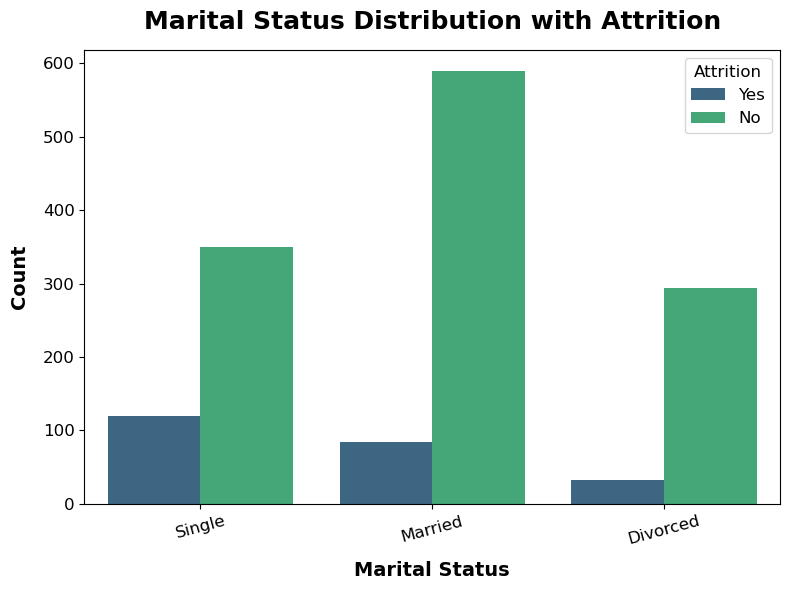

In [21]:
# Plot Marital Status Distribution with Attrition
plt.figure(figsize=(8, 6))  # Slightly larger figure for better clarity

# Count plot
sns.countplot(
    data=df,
    x="MaritalStatus",
    hue="Attrition",
    palette="viridis"
)

# Add titles and labels with improved styling
plt.title("Marital Status Distribution with Attrition", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Marital Status", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel("Count", fontsize=14, fontweight='bold', labelpad=10)

# Customize ticks
plt.xticks(fontsize=12, rotation=15)  # Rotated for better spacing if needed
plt.yticks(fontsize=12)

# Add legend with clear labels and better positioning
plt.legend(title="Attrition", fontsize=12, title_fontsize=12, loc='upper right', frameon=True)

# Adjust layout for better aesthetics
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
# Group by the categorical column and Attrition, then count occurrences
group_counts = df.groupby(['MaritalStatus'])['Attrition'].value_counts()

# Calculate percentages for each category
group_percentages = group_counts / group_counts.groupby(level=0).sum() * 100

# Filter percentages for "Yes" Attrition only
yes_attrition_percentages = group_percentages.xs('Yes', level=1).round(2)

# Display the percentages in a clean format
print("=" * 50)
print("Percentage of 'Yes' Attrition by Marital Status")
print("=" * 50)
for marital_status, percentage in yes_attrition_percentages.items():
    print(f"{marital_status}: {percentage}%")
print("=" * 50)

Percentage of 'Yes' Attrition by Marital Status
Divorced: 10.09%
Married: 12.48%
Single: 25.53%


#### Insight on Marital Status and Attrition:
- Single employees have a higher attrition rate of 25%, compared to married and divorced employees.
#### Summary:
- The higher attrition rate for single employees may indicate factors like job satisfaction or personal circumstances influencing their decision to leave the company.
#### Action:
- Further investigation is needed to understand the reasons behind the higher attrition rate among single employees.


### Gender Distribution with Attrition

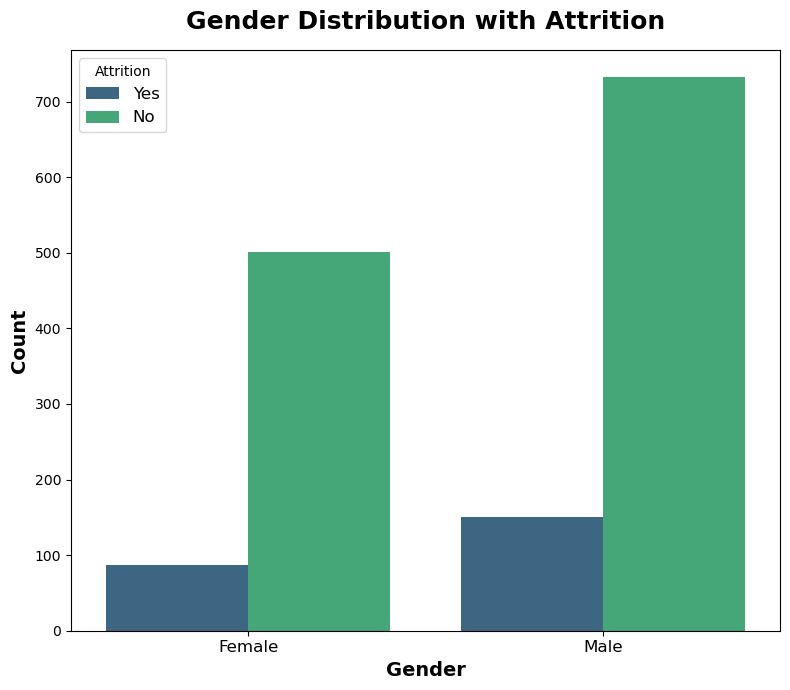

In [23]:
# Plot Gender Distribution with Attrition
plt.figure(figsize=(8, 7))

# Count plot
sns.countplot(data=df, x='Gender', hue="Attrition", palette="viridis")

# Add titles and labels
plt.title("Gender Distribution with Attrition", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Gender", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')

# Customize x-axis tick labels for better readability
plt.xticks(fontsize=12)

# Add legend with clear labels
plt.legend(title="Attrition", loc="upper left", fontsize=12)

# Adjust layout for better aesthetics
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# Group by the categorical column and Attrition, then count occurrences
group_counts = df.groupby(['Gender'])['Attrition'].value_counts()

# Calculate percentages for each category
group_percentages = group_counts / group_counts.groupby(level=0).sum() * 100

# Filter percentages for "Yes" Attrition only
yes_attrition_percentages = group_percentages.xs('Yes', level=1).round(2)

# Display the percentages in a clean format
print("=" * 50)
print("Percentage of 'Yes' Attrition by Marital Status")
print("=" * 50)
for marital_status, percentage in yes_attrition_percentages.items():
    print(f"{marital_status}: {percentage}%")
print("=" * 50)

Percentage of 'Yes' Attrition by Marital Status
Female: 14.8%
Male: 17.01%


#### Insight on Gender and Attrition:
- The attrition rate for males is 17%, while for females it is slightly lower at 14%, showing a small difference.
#### Summary:
- The attrition rates for males and females are relatively close, indicating that gender does not appear to be a major factor influencing attrition in this case.
#### Action:
- Given the minimal difference, further investigation into other factors (such as job role, department, or Monthly Income) may be more insightful for improving retention.


### Age with Attrition


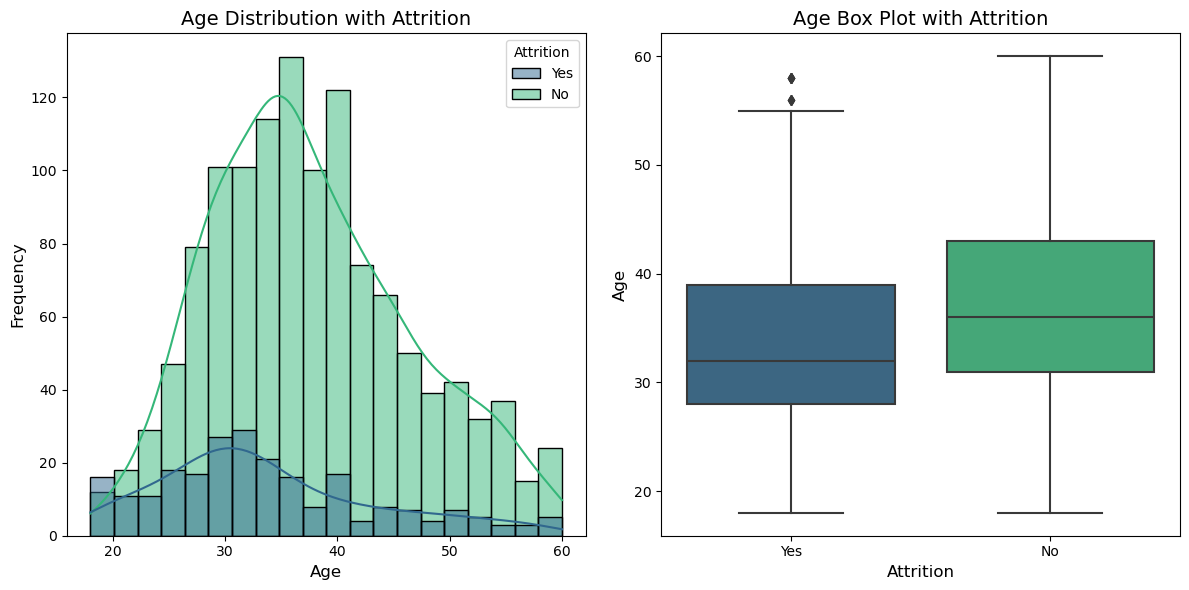

In [25]:
# Set up the figure
plt.figure(figsize=(12, 6))  # Adjust the figure size for a single plot

# Plot the histogram for Age with Attrition
plt.subplot(1, 2, 1)  # Single row, two columns, plot the first one
sns.histplot(data=df, x='Age', hue="Attrition", palette="viridis", bins=20, kde=True)
plt.title("Age Distribution with Attrition", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Plot the box plot for Age with Attrition
plt.subplot(1, 2, 2)  # Single row, two columns, plot the second one
sns.boxplot(data=df, x="Attrition", y="Age", palette="viridis")
plt.title("Age Box Plot with Attrition", fontsize=14)
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Age", fontsize=12)

# Adjust layout
plt.tight_layout(h_pad=5.0, w_pad=2.0)  # Add padding between subplots
plt.show()

In [26]:
# Calculate the mean of MonthlyIncome for each Attrition category
mean_income_by_attrition = df.groupby('Attrition')['Age'].mean()

# Display the results
print("=" * 50)
print("Mean Monthly Income for Attrition Categories")
print("=" * 50)
print(f"Yes (Attrition): {mean_income_by_attrition['Yes']:.2f}")
print(f"No (Attrition): {mean_income_by_attrition['No']:.2f}")
print("=" * 50)

Mean Monthly Income for Attrition Categories
Yes (Attrition): 33.61
No (Attrition): 37.56


#### Insight on Age and Attrition:
- The mean age for employees with Yes attrition is 33 years.
- The mean age for employees with No attrition is 37 years.
#### Summary:
* Employees who left the company (Yes attrition) are generally younger, with an average age of 33, compared to those who stayed (No attrition), who have a higher average age of 37.
* This suggests that younger employees may be more likely to leave, potentially due to career development opportunities, job satisfaction, or life-stage factors.
#### Action:
- Investigate if younger employees face challenges that lead to higher attrition rates, such as career growth opportunities, job satisfaction, or work-life balance. Tailoring retention strategies for younger employees may help reduce attrition in this group.

### MonthlyIncome with Attrition

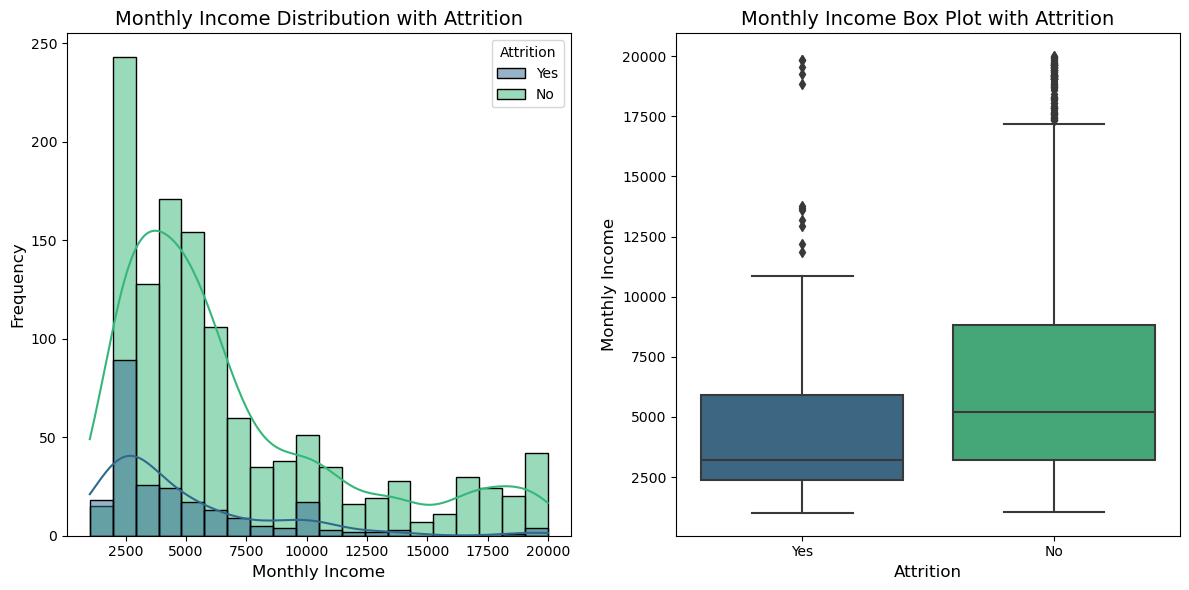

In [27]:
# Set up the figure
plt.figure(figsize=(12, 6))  # Adjust the figure size for a single plot

# Plot the histogram for MonthlyIncome with Attrition
plt.subplot(1, 2, 1)  # Single row, two columns, plot the first one
sns.histplot(data=df, x='MonthlyIncome', hue="Attrition", palette="viridis", bins=20, kde=True)
plt.title("Monthly Income Distribution with Attrition", fontsize=14)
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Plot the box plot for MonthlyIncome with Attrition
plt.subplot(1, 2, 2)  # Single row, two columns, plot the second one
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", palette="viridis")
plt.title("Monthly Income Box Plot with Attrition", fontsize=14)
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Monthly Income", fontsize=12)

# Adjust layout
plt.tight_layout(h_pad=5.0, w_pad=2.0)  # Add padding between subplots
plt.show()


In [28]:
# Calculate the mean of MonthlyIncome for each Attrition category
mean_income_by_attrition = df.groupby('Attrition')['MonthlyIncome'].mean()

# Display the results
print("=" * 50)
print("Mean Monthly Income for Attrition Categories")
print("=" * 50)
print(f"Yes (Attrition): {mean_income_by_attrition['Yes']:.2f}")
print(f"No (Attrition): {mean_income_by_attrition['No']:.2f}")
print("=" * 50)

Mean Monthly Income for Attrition Categories
Yes (Attrition): 4787.09
No (Attrition): 6832.74


#### Insight on Monthly Income and Attrition:
- The mean Monthly Income for employees with Yes attrition is 4800.
- The mean Monthly Income for employees with No attrition is 6800.
#### Summary:
- Employees who left the company have a lower average Monthly Income compared to those who stayed.
This could indicate that lower-paid employees may be more likely to leave the company.
#### Action:
- Investigate the relationship between compensation and attrition further to see if salary adjustments or retention strategies could help reduce attrition, especially among lower-paid employees.


### EDA Observation Summary: 
- The EDA reveals high attrition among Sales Representatives (40%), single employees (25%), and younger workers (33 years old).
- Employees with lower Monthly Income (4700) also show higher attrition rates compared to those with higher income (6800).
- Targeted retention strategies should focus on compensation, career development, and addressing concerns specific to these groups.

## 4-Data Preprocessing and Correlation Map


### Features Selection

In [29]:
# Drop columns that are non-relevant to the analysis
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours' , 'EmployeeNumber']
df_cleaned = df.drop(columns=columns_to_drop)

# Check the cleaned DataFrame
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")
print(f"Remaining columns: {df_cleaned.columns.tolist()}")

Cleaned DataFrame shape: (1470, 31)
Remaining columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


#### Dropped Irrelevant Columns:
- **EmployeeCount**: Contains a single value (1), providing no useful information.
- **Over18**: Contains a single value (Yes), irrelevant to the analysis.
- **StandardHours**: Contains a single value (80), offering no variation.
- **EmployeeNumber**: Represents the employee ID, which is not relevant to the analysis.

### Categorical Conversion


In [30]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding for each categorical column
for col in categorical_columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

df_cleaned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

#### I applied Label Encoding to convert categorical values into numerical format. This step helps facilitate analysis by transforming categorical features (such as Attrition, Gender, MaritalStatus, etc.) into numerical values, allowing for easier application of machine learning algorithms and statistical analysis.


### Correlation Map 

In [32]:
# Compute the correlation matrix of the cleaned numerical columns
correlation_matrix = df_cleaned.corr()
correlation_matrix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,-0.16,0.02,0.01,-0.03,-0.00,0.21,-0.04,0.01,-0.04,...,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
Attrition,-0.16,1.00,0.00,-0.06,0.06,0.08,-0.03,0.03,-0.10,0.03,...,0.00,-0.05,-0.14,-0.17,-0.06,-0.06,-0.13,-0.16,-0.03,-0.16
BusinessTravel,0.02,0.00,1.00,-0.00,-0.01,-0.02,0.00,0.02,0.00,-0.03,...,-0.03,-0.04,-0.02,0.03,0.02,-0.01,-0.01,-0.01,-0.03,-0.02
DailyRate,0.01,-0.06,-0.00,1.00,0.01,-0.00,-0.02,0.04,0.02,-0.01,...,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
Department,-0.03,0.06,-0.01,0.01,1.00,0.02,0.01,0.01,-0.02,-0.04,...,-0.02,-0.02,-0.01,-0.02,0.04,0.03,0.02,0.06,0.04,0.03
DistanceFromHome,-0.00,0.08,-0.02,-0.00,0.02,1.00,0.02,0.00,-0.02,-0.00,...,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.03,0.00,-0.02,0.01,0.02,1.00,-0.04,-0.03,-0.02,...,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EducationField,-0.04,0.03,0.02,0.04,0.01,0.00,-0.04,1.00,0.04,-0.00,...,-0.01,-0.00,-0.02,-0.03,0.05,0.04,-0.02,-0.01,0.00,-0.00
EnvironmentSatisfaction,0.01,-0.10,0.00,0.02,-0.02,-0.02,-0.03,0.04,1.00,0.00,...,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
Gender,-0.04,0.03,-0.03,-0.01,-0.04,-0.00,-0.02,-0.00,0.00,1.00,...,-0.01,0.02,0.01,-0.05,-0.04,-0.00,-0.03,-0.04,-0.03,-0.03


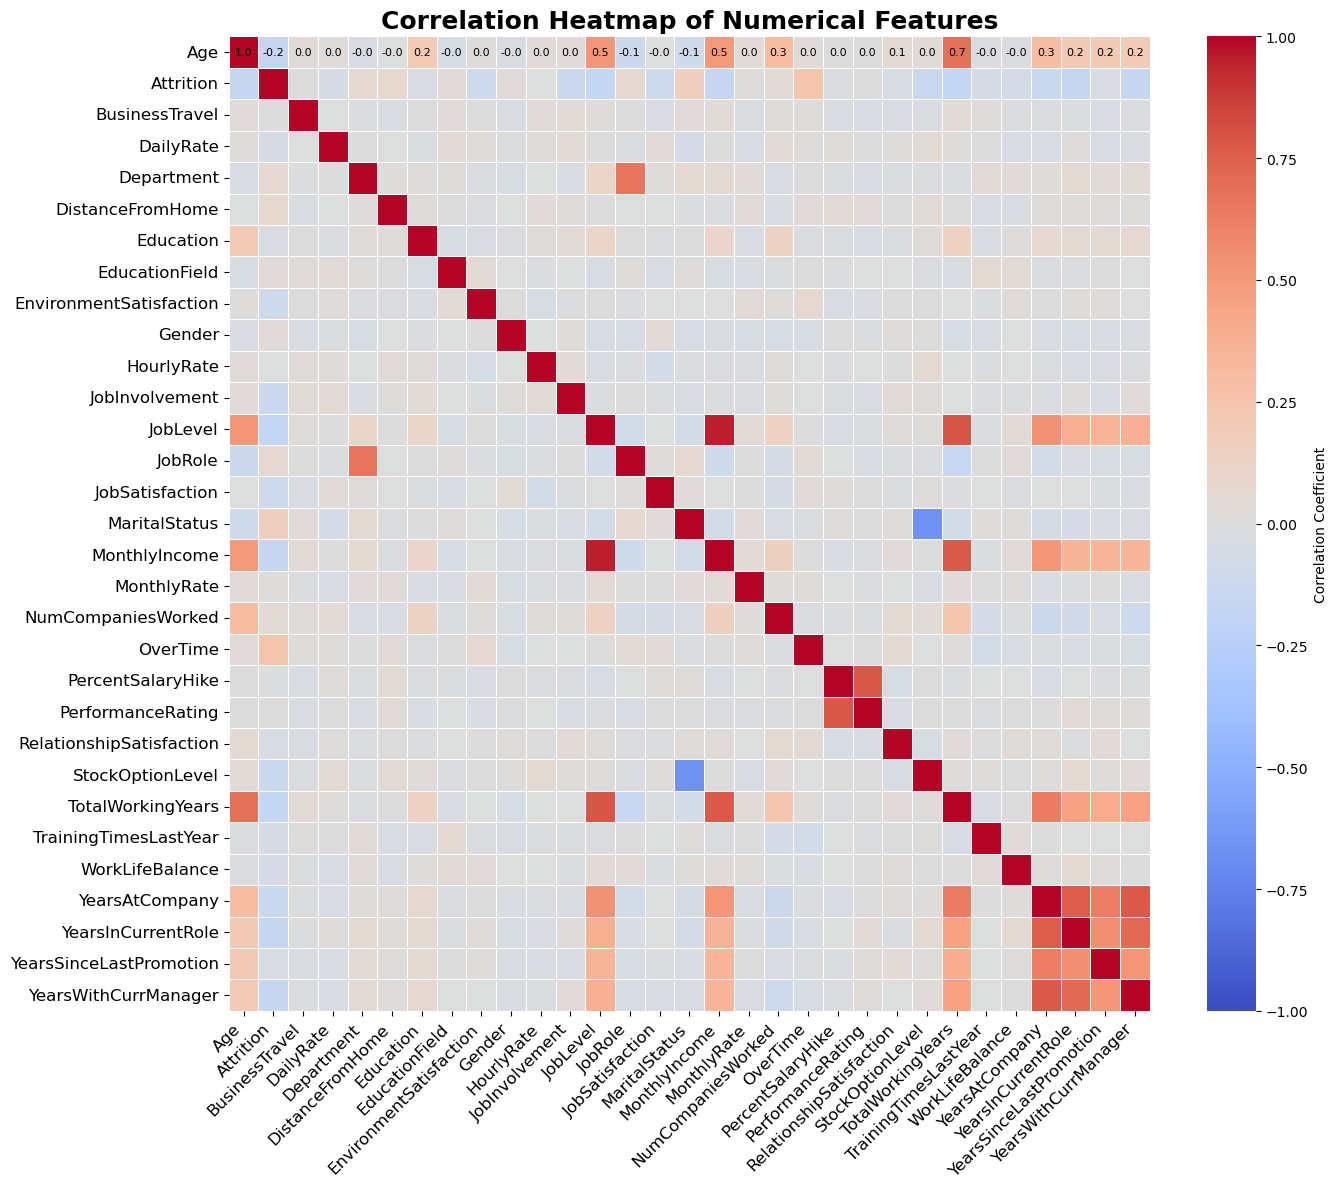

In [33]:
# Plot the correlation heatmap with improved text readability
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".1f",
    cmap="coolwarm", 
    cbar_kws={'label': 'Correlation Coefficient'},
    linewidths=0.5,  # Add lines between cells
    linecolor='white',  # White line color for distinction
    vmin=-1, vmax=1,  # Set limits for color scale
    annot_kws={'size': 8,'color': 'black'},  # Adjust annotation style
)

# Title and labels
plt.title("Correlation Heatmap of Numerical Features", fontsize=18, weight='bold')
plt.xticks(fontsize=12, rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12, rotation=0)  # Keep y-axis labels horizontal

# Show the plot
plt.tight_layout()
plt.show()

#### I plotted a correlation map to identify potential relationships between variables. This revealed key insights and highlighted interesting correlations to investigate further, such as:

- Marital Status and Stock Option Level
- Performance Rating and Percent Salary Hike
- Monthly Income and Total Working Years

These relationships could provide deeper insights into employee behavior and help guide further analysis or feature engineering for predictive modeling.

## 5-ML Model

### Data Splitting:

In [34]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target variable (y)
X = df_cleaned.drop(columns=['Attrition'])  # Features
y = df_cleaned['Attrition']  # Target variable (Attrition)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1176, 30)
Testing data shape: (294, 30)


### Model Selection & Training:

In [35]:
# Step 1: Scale the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression

In [36]:
# Train Logistic Regression Model
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_lg = logreg.predict(X_test_scaled)

#### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

#### Support Vector Machine (SVM)

In [38]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

### Models Evaluation:

In [39]:
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": logreg,
    "Random Forest": rf_model,
    "SVM": svm_model
}

# Print classification report for each model with enhanced formatting
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print("=" * 50)
    print(f"{model_name} Classification Report:")
    print("=" * 50)
    print(classification_report(y_test, y_pred))
    print("=" * 50, "\n")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.68      0.55      0.56       294
weighted avg       0.80      0.84      0.80       294


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.67      0.17      0.27        47

    accuracy                           0.85       294
   macro avg       

#### Final Model Comparison:
Here is a comparison of the Logistic Regression, Random Forest, and SVM models based on their performance metrics:

##### Logistic Regression:

- Accuracy: 87%
- F1-Score: 71
##### Insights: 
Logistic Regression shows the highest accuracy and F1-score, indicating it performs the best in balancing precision and recall, especially for attrition prediction.

##### Random Forest:

- Accuracy: 84%
- F1-Score: 56
##### Insights: 
While Random Forest has a slightly lower accuracy compared to Logistic Regression, its F1-score is much lower, suggesting that it struggles with precision-recall balance, possibly due to class imbalance or overfitting.

##### SVM:

- Accuracy: 85%
- F1-Score: 59
##### Insights:
SVM performs similarly to Random Forest in terms of accuracy but still lags behind Logistic Regression in terms of F1-score, indicating it may not handle the attrition prediction as effectively as Logistic Regression.

##### Conclusion:
Logistic Regression outperforms both Random Forest and SVM in terms of both accuracy and F1-score, making it the preferred model for predicting attrition in this case. However, there is still room for further optimization or consideration of ensemble methods for improved performance.

## Thank you for taking the time to review this analysis!😊